<a href="https://colab.research.google.com/github/Ilya-Lopatin/Sylvester_problem/blob/main/Sylvestr_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from numpy.linalg import norm
from numpy.linalg import det


m_zero = 1e-7

In [2]:
def get_cyrcle_2d (a, b, c):

    def get_matrix_det (f, s):
        A = np.vstack( (f, s) )
        A = A.T
        on = np.array( [ [1], [1], [1]] )
        A = np.hstack((A, on))
        return det(A)

    x = np.array( [ a[0], b[0], c[0]  ] )
    y = np.array( [ a[1], b[1], c[1]  ] )
    vn = np.array( [ norm(a)**2, norm(b)**2, norm(c)**2 ] )

    det0 = get_matrix_det(x, y)
    detx = get_matrix_det(vn, y)
    dety = -get_matrix_det(vn, x)

    center = np.array([ detx, dety]) / (2*det0)
    r = norm( a - center )

    return center, r

def check_in (x, a, b, c):
    
    def get_square (a, b, c):
        r1 = b - c
        r2 = a - c
        A = np.vstack( (r1, r2) )
        return abs( det(A) )
    
    S0 =  get_square (a, b, c)
    S1 =  get_square (x, b, c)
    S2 =  get_square (x, a, c)
    S3 =  get_square (x, a, b)

    return bool ( abs( S0 - (S1+S2+S3) ) < m_zero )   

def check_covering ( center, radius, Data ) :
    for i in range ( len(Data[0]) ) :
        if norm( Data[:, i] - center  ) - m_zero > radius :
            return False
    return True           


In [3]:
kol = 10
Points = rand.sample((2, kol))
scal = 1
delta = scal* rand.sample((2, 1))
Data = scal * Points - delta

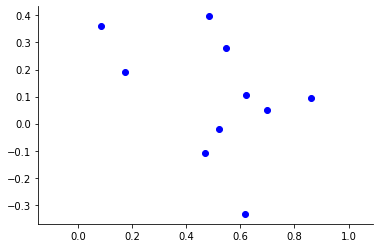

In [4]:
plt.plot( Data[0] , Data[1] , 'ob' )
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis('equal')
plt.show()

In [5]:
center_f, radius_f = [0, 0], 1 #future answer

In [6]:
flag_success = False
for i in range( kol - 1 ) :
    for j in range( i+1, kol) :
        c = ( Data[ :,i] + Data[ :,j] ) * 0.5
        r = norm( Data[ :,i] - c )
        flag2 = check_covering(c, r, Data)
        if ( flag2 == True ):
            center_f, radius_f = c, r
            flag_success = True
            break 

if flag_success == False:
    for i in range (kol - 2):
        for j in range ( i+1, kol-1):
            for q in range ( j+1, kol ):
                a1 = np.array( [ Data[0, i], Data[1, i]  ] )
                a2 = np.array( [ Data[0, j], Data[1, j]  ] )
                a3 = np.array( [ Data[0, q], Data[1, q]  ] )
                c, r = get_cyrcle_2d ( a1,  a2, a3 )
                flag_covering = check_covering (c, r, Data)
                if flag_covering == True:
                    flag_minimum = check_in ( np.array( [0,0] ),  a1 - c, a2 - c , a3 - c)
                    if flag_minimum == True:
                        center_f, radius_f = c, r
                        break      

center:[0.41589227 0.06289582]
r=0.4452565573272402


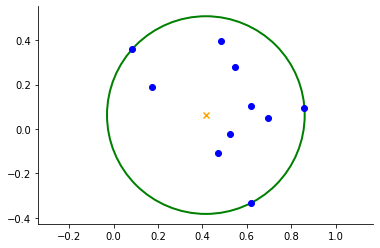

In [7]:
plt.figure()
ax = plt.gca()

circle = patches.Circle(center_f, radius_f, edgecolor='g', fc='None', lw=2, facecolor='none')
ax.add_patch(circle)

plt.plot( Data[0] , Data[1] , 'ob' )
plt.scatter(center_f[0] , center_f[1], color='orange', marker='x')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis('equal')
plt.plot()
print( f"center:{center_f}")
print(f"r={radius_f}")